In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

raw_data = pd.read_csv('./datasets/TSLA.csv')
raw_data.head()

df = raw_data.loc[:,['Date', 'Close']]
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


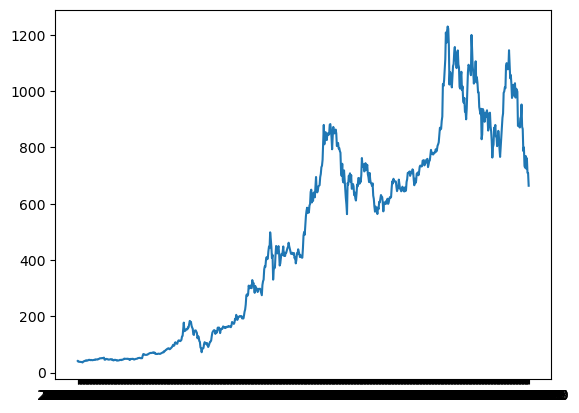

In [6]:
plt.plot( df['Date'], df['Close'])

In [8]:
first_diff = df['Close'].diff()

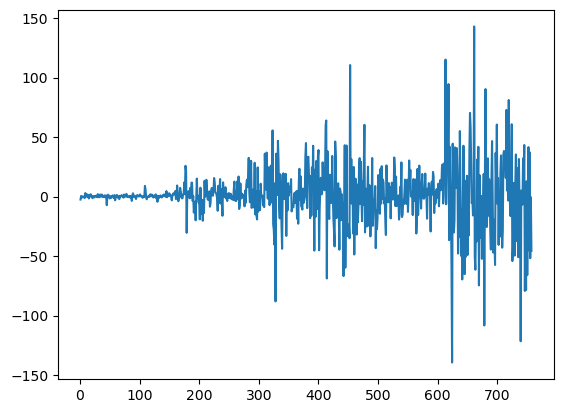

In [9]:
plt.plot(first_diff)

In [41]:
X = df['Close']

train_size = int(len(X) * 0.80)

X_train, X_test = X[0:train_size], X[train_size:len(X)]


X_train= X_train.to_numpy()
X_test = X_test.to_numpy()


X_train.shape

(606,)

In [42]:
#fit SARIMA model
my_order = (0,1,0)
my_seasonal_order = (1,0,1,12)

model = SARIMAX(X_train, order=my_order, seasonal_order=my_seasonal_order)

In [43]:
model_fit = model.fit()

In [44]:
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  606
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -2553.430
Date:                              Wed, 03 Jul 2024   AIC                           5112.861
Time:                                      12:40:12   BIC                           5126.076
Sample:                                           0   HQIC                          5118.003
                                              - 606                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5205      0.307      1.696      0.090      -0.081       1.122
ma.S.L12      -0.45

In [45]:
prediction = model_fit.forecast(len(X_test))

In [46]:
prediction = pd.Series(prediction, index = X_test)
residuals = X_test-prediction

In [49]:
residuals

818.320007      8.693138
843.030029     32.898393
870.109985     60.482059
864.270020     54.172104
865.799988     54.969166
                 ...    
724.369995    -92.933514
761.609985    -55.693814
709.809998   -107.493843
709.419983   -107.883532
663.900024   -153.403801
Length: 152, dtype: float64